<a href="https://colab.research.google.com/github/sunfflur/frequency-learning-DHT/blob/main/kylberg-texture-dataset/Exp_KTD_a_DHT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Experiment KTD_a_FHT

`Author:` [sunfflur](https://github.com/sunfflur)

> Experiment KTD_a uses the 28 classes from **Kylberg** dataset divided in 70% / 30% (per class) with *576x576* pixels of dimension each image (resized). Version 'a' means the original architecture.  


---

#### Setup

In [ ]:
s = 23
import os
os.environ['PYTHONHASHSEED']=str(s)
import random
random.seed(s)
from numpy.random import seed
seed(s)
import tensorflow as tf
#import tensorflow
tf.random.set_seed(s)
#from tensorflow.random import set_seed
#set_seed(s)

import PIL
import numpy as np

from tensorflow.keras.layers import Layer, Dense, Conv1D, Dropout, MaxPooling2D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import to_categorical, image_dataset_from_directory
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sn

!pip install autokeras
!pip install tensorflow-addons
!pip install tensorflow-recommenders

import tensorflow_addons as tfa
import tensorflow_recommenders as tfrs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 KB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 466.8/466.8 KB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.3/167.3 KB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 62.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.2/96.2 KB 3.7 MB/s eta 0:00:00


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Thu Mar 16 15:23:27 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P0    28W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


#### Drive mount

In [ ]:
!sudo add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!sudo apt-get update -qq 2>&1 > /dev/null
!sudo apt -y install -qq google-drive-ocamlfuse 2>&1 > /dev/null
!google-drive-ocamlfuse



debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
/usr/bin/xdg-open: 869: www-browser: not found
/usr/bin/xdg-open: 869: links2: not found
/usr/bin/xdg-open: 869: elinks: not found
/usr/bin/xdg-open: 869: links: not found
/usr/bin/xdg-open: 869: lynx: not found
/usr/bin/xdg-open: 869: w3m: not found
xdg-open: no method available for opening 'https://accounts.google.com/o/oauth2/auth?client_id=564921029129.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fgd-ocaml-auth.appspot.com%2Foauth2callback&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&

In [ ]:
!sudo apt-get install -qq w3m # to act as web browser
!xdg-settings set default-web-browser w3m.desktop # to set default browser
%cd /content
!mkdir drive
%cd drive
!mkdir MyDrive
%cd ..
%cd ..
!google-drive-ocamlfuse /content/drive/MyDrive

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package w3m.
(Reading database ... 128281 files and directories currently installed.)
Preparing to unpack .../w3m_0.5.3-37ubuntu0.1_amd64.deb ...
Unpacking w3m (0.5.3-37ubuntu0.1) ...
Setting up w3m (0.5.3-37ubuntu0.1) ...
Processing triggers for man-db (2.9.1-1) ...
Processing triggers for mime-support (3.64ubuntu1) ...
/content
/content/drive
/content
/
Access token retrieved correctly.


#### Data preparation

In [ ]:
### data paths ###
path_train = '/content/drive/MyDrive/Mestrado/Datasets/kylberg-dataset/kylberg_train.npy'
path_ytrain = '/content/drive/MyDrive/Mestrado/Datasets/kylberg-dataset/kylberg_y_train.npy'
path_test = '/content/drive/MyDrive/Mestrado/Datasets/kylberg-dataset/kylberg_test.npy'
path_ytest = '/content/drive/MyDrive/Mestrado/Datasets/kylberg-dataset/kylberg_y_test.npy'

# load train and test sets
x_train, x_test = np.load(path_train), np.load(path_test)
y_train, y_test = np.load(path_ytrain), np.load(path_ytest)

#add extra dimension (channel)
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

# resize using bilinear method and change labels to categorical format
new_shape = (576,576)
x_train, x_test = tf.image.resize(x_train, new_shape), tf.image.resize(x_test, new_shape)
y_train, y_test = tf.stack(to_categorical(y_train)), tf.stack(to_categorical(y_test))

In [ ]:
x_train.shape

TensorShape([3360, 576, 576, 1])

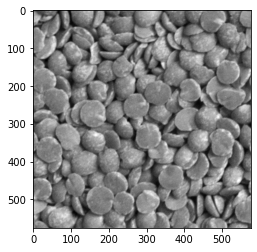

In [ ]:
plt.imshow(tf.squeeze(x_train[2]), cmap='gray') #control image
plt.show()

#### Image Main Functions - Per Image

In [ ]:
### slicing PER IMAGE ###

''' here the images are splitted into blocks of same dimension, so we have an output that contains the number of images,
    the number of blocks the images were splitted, the 1st shape of the blocks, the second shape of the blocks and then the number of channels'''

def slice_data(images, levels):
  outputs = []
  if levels == 0:
    dim = int(tf.rank(images))
    if dim == 3:
      images = tf.expand_dims(images, -1)
      images = tf.transpose(images, [0, 3, 1, 2])
      return images
    else:
      images = tf.transpose(images, [0, 3, 1, 2])
      return images
  for image in images:
    iM, iN = image.shape[0], image.shape[1] # shapes
    iMc, iNc = int(iM/2), int(iN/2) # image center
    output = tf.stack((image[:iMc, :iNc], image[:iMc,iNc:], image[iMc:,:iNc], image[iMc:, iNc:]),-1) # crop by index
    output = tf.reshape(output,[output.shape[0],output.shape[1], -1])
    outputs.append(output)
  outputs = tf.convert_to_tensor(outputs)
  return slice_data(outputs, levels-1) # output shape: (images, blocks, shape[0], shape[1], channels)

In [ ]:
### DFT PER IMAGE ###

''' here we calculate the Discrete Fourier Transform. The function is called for each block, so we move from the
    spatial to frequency domain keeping the same dimensions. '''

def m_spectrum(images):
  magnitudes = []
  for image in images:
    side = image.shape[1]
    inputx = tf.cast(image, tf.complex128) # change dtype to complex64
    fft = tf.signal.fft2d(inputx) # perform fast fourier transform
    fft_shift = tf.signal.fftshift(fft, axes=(1,2)) # shift the zero-frequency component to the center

    # calculate the magnitude and scale it
    magnitude = tf.math.abs(fft_shift)
    magnitude = tf.math.divide(magnitude, side**2)
    magnitude = tf.math.log(1+magnitude)
    magnitudes.append(magnitude)
  return tf.convert_to_tensor(magnitudes)

In [ ]:
''' after applying the magnitude sums we need to normalize the data to eb trained (now the coefficients)'''

def NormalizeData(X, max=1, min=0):
    ### data normalization between 0-1
    X_std = (X - tf.math.reduce_min(X)) / (tf.math.reduce_max(X) - tf.math.reduce_min(X))
    X_scaled = X_std * (max - min) + min
    return X_scaled

In [ ]:
''' Here we perform Discrete Hartley Transform. We use its relationship with the DFT to calculate it and then
    we apply the abs of the hyperbolic arcsin to normalize the results.'''

def DHT(images):
  fhts = []
  for image in images:
    side = image.shape[1]
    inputx = tf.cast(image, tf.complex128) # change dtype to complex64
    fft = tf.signal.fft2d(inputx) # perform fast fourier transform
    fft_shift = tf.signal.fftshift(fft, axes=(1,2)) # shift the zero-frequency component to the center
    real = tf.math.real(fft_shift) # gets the real part of the DFT
    imag = tf.math.imag(fft_shift) # gets the imaginary part of the DFT

    # calculate the hartley transform from the real and imaginary parts of the FFT
    FHT = real - imag
    FHT = tf.math.divide(FHT, side**2)
    FHT = tf.math.abs(tf.math.asinh(FHT)) # normalize
    fhts.append(FHT)
  return tf.convert_to_tensor(fhts)

In [ ]:
### magnitude sums PER IMAGE ###

''' We can perform the magnitude sums considering euclidean or chebyshev distances. This function refers to the euclidean distance
    and was performed for testing, the chebyshev distance was calculated for the final experiments. both produce similar results.'''

def radial_grouping(images, r):
  grouping = []
  for image in images:
    iM, iN = image.shape[1], image.shape[2] #image dimension
    iMc, iNc = int(iM/2), int(iN/2) #image center
    A = tf.range(-iMc,iNc)**2
    dists = tf.math.sqrt(tf.cast(A[:,None] + A, dtype=tf.float64))
    dists = tf.reshape(dists, [1,image.shape[1],image.shape[2]]) #1,512,512
    n = int(iNc/r) #rings number
    magnitude_sums = []
    ring = 0
    for j in range(1, 2*n, 2):
      ring = tf.cast((tf.abs(dists-(r/2)*j)<(r/2)), dtype=tf.float64)
      if j == 1:
        ring = tf.cast((tf.abs(dists-(r/2)*j)<=(r/2)), dtype=tf.float64)
      mult = tf.multiply(ring,image)
      sum = tf.reduce_sum(mult,axis=(1,2))
      magnitude_sums.append(sum.numpy())
    magnitude_sums = tf.convert_to_tensor(magnitude_sums)
    grouping.append(magnitude_sums)
  grouping = tf.convert_to_tensor(grouping)
  grouping = tf.reshape(grouping, [grouping.shape[0], -1])
  return grouping

In [ ]:
### magnitude sums PER IMAGE ###

''' Here we create the functions to calculate the chebyshev distance when creating each ring. This option is faster than the previous one but produces
    similar results after training. '''

def create_square(size=None, radius=None, width=None):
  image = np.zeros((size, size))
  center = (size-1) / 2
  linhas=np.arange(0,size,1).reshape(size,1) #u
  colunas=np.arange(0,size,1).reshape(1,size) #v
  condition_1=np.abs(linhas-center) # |x1-x2|
  condition_2=np.abs(colunas-center) # |y1-y2|
  maximo=np.maximum(condition_1,condition_2) # max(|x1-x2|,|y1-y2|) # chebyshev
  desigualdade=np.less_equal(maximo,radius)
  desigualdade_2=np.greater(maximo,radius-width) # max <= r
  return np.logical_and(desigualdade,desigualdade_2).astype(np.float64)

def square_grouping(images, w):
  grouping = []
  for image in images:
    iM, iN = image.shape[1], image.shape[2] #image dimension
    iMc, iNc = int(iM/2), int(iN/2) #image center
    magnitude_sums = []
    for r in range(w, (iM//2)+1, w):
      ring = create_square(iM, r, w)
      ring = tf.convert_to_tensor(ring, dtype=tf.float64)
      mult = tf.multiply(ring, image) # performs the product between the block and the ring
      sum = tf.reduce_sum(mult,axis=(1,2)) # sums the output
      magnitude_sums.append(sum.numpy())
    magnitude_sums = tf.convert_to_tensor(magnitude_sums)
    grouping.append(magnitude_sums)
  grouping = tf.convert_to_tensor(grouping)
  grouping = tf.reshape(grouping, [grouping.shape[0], -1])
  return grouping

''' VERSION 1 BELOW: performs the same thing, but slower.

    To use, comment one of the square_grouping functions'''


def square_grouping(images, r):
  grouping = []
  for image in images:
    iM, iN = image.shape[1], image.shape[2] #image dimension
    iMc, iNc = int(iM/2), int(iN/2) #image center
    A = tf.range(-iMc,iNc)**2
    n = int(iNc/r) #rings number
    ring = np.full((iM,iN), 0)
    magnitude_sums = []
    for w in range(r, (n*r)+1, r):
      ring[iMc-w:iMc+w,iNc-w:iNc+w] = 1
      ring[iMc-w + r :iMc+w -r ,iNc-w +r :iNc+w -r] = 0
      mult = tf.multiply(ring, image) # performs the product between the block and the ring
      sum = tf.reduce_sum(mult,axis=(1,2)) # sums the output
      magnitude_sums.append(sum.numpy())
    magnitude_sums = tf.convert_to_tensor(magnitude_sums)
    grouping.append(magnitude_sums)
  grouping = tf.convert_to_tensor(grouping)
  grouping = tf.reshape(grouping, [grouping.shape[0], -1])
  return grouping


#### Data Pre-Process - 3 levels

In [ ]:
''' Here we create a class to preprocess the data, which means we have as input the 'x_train/test/valid' and produces as output
    the coefficients that are going to be used as input on the frequency layer. On this function the images follows through the stages
    defined: slicing, DFT and magnitude sums (grouping). At the end, the data is normalized between 0-1.

    To call this class, we need to defined which are the data (images of shape (N, shape[0], shape[1], channels), the number of slicing levels
    and the width (w) of the rings)'''

class PreProcess():
  def __init__(self, data, level, r): #level = levels number; r = radius (ring width);
    self.data = data #x_train/test
    self.level = level
    self.r = r
  def processing(self):
    conc_channels = []
    for i in range(0, self.level+1):
      print('level:', i)
      for j in range(0, self.data.shape[3]):
        print('channel:', j)
        sliced_data = slice_data(self.data[:,:,:,j], levels=i)
        dht_data = DHT(sliced_data)
        #grouping_data = radial_grouping(dft_data, r=self.r) # r = radius (ring width)
        grouping_data = square_grouping(dht_data, r=self.r) # r = radius (ring width)
        conc_channels.append(grouping_data)
        #del sliced_data
        #del dht_data
        #del grouping_data
      conc = tf.concat((conc_channels), axis=1)
    input = np.asarray(tf.concat((conc), axis=1))
    inp = NormalizeData(input)
    input = tf.convert_to_tensor(inp)
    return input, sliced_data, dht_data

In [ ]:
x_train1 = x_train[:1120]
x_train2 = x_train[1120:2240]
x_train3 = x_train[2240:]

In [ ]:
with tf.device('/CPU:0'):
  input_train, sliced_data, dht_data  = PreProcess(x_train1[:20], 2, r=1).processing() #2 levels means original image + division in 4 blocks + division in 16 blocks (4 blocks again)

level: 0
channel: 0
level: 1
channel: 0
level: 2
channel: 0


In [ ]:
input_train.shape

TensorShape([20, 2016])

In [ ]:
np.save('input_train', input_train)

In [ ]:
with tf.device('/CPU:0'):
  input_train2, sliced_data2, dht_data2  = PreProcess(x_train2, 2, r=1).processing() #2 levels means original image + division in 4 blocks + division in 16 blocks (4 blocks again)

level: 0
channel: 0
level: 1
channel: 0
level: 2
channel: 0


In [ ]:
input_train2.shape #

TensorShape([1120, 2016])

In [ ]:
np.save('input_train2', input_train2)

In [ ]:
with tf.device('/CPU:0'):
  input_train3, sliced_data3, dht_data3  = PreProcess(x_train3, 2, r=1).processing() #2 levels means original image + division in 4 blocks + division in 16 blocks (4 blocks again)

level: 0
channel: 0
level: 1
channel: 0
level: 2
channel: 0


In [ ]:
input_train = np.load('/input_train.npy')
input_train2 = np.load('/input_train2.npy')

In [ ]:
t = tf.concat([input_train, input_train2, input_train3], axis=0)

In [ ]:
t.shape

TensorShape([3360, 2016])

In [ ]:
np.save('input_train_ktd_l2_w1_square576_dht_v5.npy', t) #V3

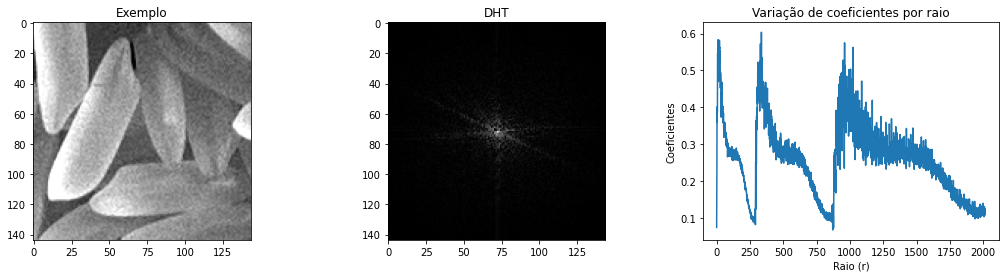

In [ ]:
example = 9
block = 0
x = input_train[example]

plt.figure(figsize=(18,4))
plt.subplot(131), plt.imshow(sliced_data[example, block,:,:], cmap='gray')
plt.title('Exemplo')
plt.subplot(132), plt.imshow(dht_data[example, block,:,:], cmap='gray')
plt.title('DHT')
plt.subplot(133), plt.plot(x)
plt.title('Variação de coeficientes por raio'), plt.xlabel('Raio (r)'), plt.ylabel('Coeficientes')
plt.show()

In [ ]:
with tf.device('/CPU:0'):
  input_test, sliced_data_test, dht_data_test = PreProcess(x_test, 2, r=1).processing()

level: 0
channel: 0
level: 1
channel: 0
level: 2
channel: 0


In [ ]:
np.save('input_test_ktd_l2_w1_square576_dht_v5.npy', input_test) #v3

In [ ]:
example = 0
block = 0
x = input_test[example]

plt.figure(figsize=(16,4))
plt.subplot(131), plt.imshow(sliced_data_test[example, block,:,:], cmap='gray')
plt.title('Exemplo')
plt.subplot(132), plt.imshow(dht_data_test[example, block,:,:], cmap='gray')
plt.title('Espectro de magnitude')
plt.subplot(133), plt.plot(x)
plt.title('Variação de coeficientes por raio'), plt.xlabel('Raio (r)'), plt.ylabel('Coeficientes')
plt.show()

#### Data Load

In [ ]:
### Saved Pre-Processed data LOAD ###

def LOAD(path_train=None, path_valid=None, path_test=None, extra_layers='Dense'):
  if extra_layers=='Dense':
    if path_valid!=False:
      input = tf.convert_to_tensor(np.load(path_train)) ### train
      input_valid = tf.convert_to_tensor(np.load(path_valid)) ### valid
      input_test = tf.convert_to_tensor(np.load(path_test)) ### test
    else:
      input = tf.convert_to_tensor(np.load(path_train)) ### train
      input_test = tf.convert_to_tensor(np.load(path_test)) ### test
  else:
    if path_valid!=False:
      input = tf.convert_to_tensor(np.load(path_train)) ### train
      input = tf.expand_dims(input, -1)
      input_valid = tf.convert_to_tensor(np.load(path_valid)) ### valid
      input_valid = tf.expand_dims(input_valid, -1)
      input_test = tf.convert_to_tensor(np.load(path_test)) ### test
      input_test = tf.expand_dims(input_test, -1)
    else:
      input = tf.convert_to_tensor(np.load(path_train)) ### train
      input = tf.expand_dims(input, -1)
      input_test = tf.convert_to_tensor(np.load(path_test)) ### test
      input_test = tf.expand_dims(input_test, -1)
  return input, input_test

In [ ]:
input, input_test = LOAD(path_train='/content/drive/MyDrive/Mestrado/Experimentos/exp2-KTD/exp2-data/square-grouping/3-levels/input_train_ktd_l2_w1_square576_dht_v3.npy', #v3
                                      path_valid=False,
                                      path_test='/content/drive/MyDrive/Mestrado/Experimentos/exp2-KTD/exp2-data/square-grouping/3-levels/input_test_ktd_l2_w1_square576_dht_v3.npy',
                                      extra_layers='Dense')

In [ ]:
input.shape # preprocessed data shape (here we have 2016 coefficients)

TensorShape([3360, 2016])

#### Custom Layer

In [ ]:
''' Here we create the Frequency Layer that are going to perform the convolution operation in the frequency
    domain. In this scenario, the convolution is a product between the coefficients and the filter.'''

class FreqLayer(Layer):
  def __init__(self, units, kernel_initializer='RandomNormal', extra_layers='Dense', output_type='Dense', **kwargs):
    super().__init__(**kwargs)
    self.units = units
    self.kernel_initializer = kernel_initializer
    self.extra_layers = extra_layers
    self.output_type = output_type
  def get_config(self):
    config = super(FreqLayer, self).get_config()
    config.update({
      "units": self.units,
      "kernel_initializer": self.kernel_initializer,
      "extra_layers": self.extra_layers,
      "output_type": self.output_type
      })
    return config
  def build(self, batch_input_shape):
    if self.extra_layers == 'Dense':
      shape = [batch_input_shape[-1],self.units] #(weights,) - shape for dense training
    else:
      shape = [batch_input_shape[-2],1] #(weights, 1) - shape for convolutional training
    self.kernel = self.add_weight(
        name='kernel',
        shape = shape,
        initializer=self.kernel_initializer,
        trainable=True)
    super().build(batch_input_shape) # must be at the end
  def call(self, X):
    #### fourier and hartley convolution can be the same due to the filter even symmetry ####
    f = tf.expand_dims(X, -1)*self.kernel
    return f
  def compute_output_shape(self, batch_input_shape):
    if self.output_type == 'Dense':
      return tf.TensorShape(batch_input_shape.as_list()[:-1] + [self.units]) #[examples,1] - dense
    else:
      return tf.TensorShape(batch_input_shape.as_list()[:-2] + [self.units]) #[examples,1] - conv1d

### Experiments performed can be accessed below.

#### Preliminary experiment

In [ ]:
### dense ###
tf.random.set_seed(s) #s
init = 'glorot_normal' #glorot_normal
function = 'LeakyReLU' #LeakyReLU
#function = tf.keras.layers.LeakyReLU(alpha=0.4)

model = Sequential([
    FreqLayer(1, kernel_initializer=tf.keras.initializers.RandomNormal(mean=2, stddev=0.01)), #0.01
    Dense(128, activation=function, #128
          kernel_initializer=init, bias_initializer=init),
    Dropout(0.25), #0.25
    Dense(64, activation=function, #128
         kernel_initializer=init, bias_initializer=init),
    Dropout(0.15),  #0.15
    Dense(28, activation='softmax')])

In [ ]:
### inverse time decay  ###
inversetime_decay = tf.keras.optimizers.schedules.InverseTimeDecay(
  initial_learning_rate = 0.01, #0.01-original e 0.0001-30%
  decay_steps = input.shape[0]/10,
  decay_rate = 0.009) #0.009 - 99,82%

### optimizers ###
d_m=0.6 #momentum - dense layers

opt1 = SGD(learning_rate=inversetime_decay, momentum=0.3) #84

opt2 = tfrs.experimental.optimizers.CompositeOptimizer([
      (SGD(learning_rate=inversetime_decay, momentum=0.0), lambda: [model.layers[0].kernel]),
      (SGD(learning_rate=inversetime_decay, momentum=d_m), lambda: model.layers[1].weights),
      (SGD(learning_rate=inversetime_decay, momentum=d_m), lambda: model.layers[2].weights),
      (SGD(learning_rate=inversetime_decay, momentum=d_m), lambda: model.layers[3].weights),
      (SGD(learning_rate=inversetime_decay, momentum=d_m), lambda: model.layers[4].weights),
      (SGD(learning_rate=inversetime_decay, momentum=d_m), lambda: model.layers[5].weights)])

opt3 = Adam(learning_rate=0.0001)

model.compile(optimizer=opt2, loss='categorical_crossentropy', metrics=['accuracy'])
#earlystop = tf.keras.callbacks.EarlyStopping(monitor='loss', min_delta=0, patience=500) # patience = 15
history =  model.fit(input, y_train, epochs=500, batch_size=10, verbose=1, shuffle=True) #validation_split=0.2

Epoch 1/500
336/336 [==============================] - 5s 3ms/step - loss: 2.2670 - accuracy: 0.2964
Epoch 2/500
336/336 [==============================] - 1s 3ms/step - loss: 1.0473 - accuracy: 0.6432
Epoch 3/500
336/336 [==============================] - 1s 3ms/step - loss: 0.7467 - accuracy: 0.7443
Epoch 4/500
336/336 [==============================] - 1s 3ms/step - loss: 0.5567 - accuracy: 0.8060
Epoch 5/500
336/336 [==============================] - 1s 3ms/step - loss: 0.4416 - accuracy: 0.8438
Epoch 6/500
336/336 [==============================] - 1s 3ms/step - loss: 0.3689 - accuracy: 0.8685
Epoch 7/500
336/336 [==============================] - 1s 3ms/step - loss: 0.3547 - accuracy: 0.8732
Epoch 8/500
336/336 [==============================] - 1s 3ms/step - loss: 0.3512 - accuracy: 0.8839
Epoch 9/500
336/336 [==============================] - 1s 3ms/step - loss: 0.3166 - accuracy: 0.8911
Epoch 10/500
336/336 [==============================] - 1s 3ms/step - loss: 0.2621 - accura

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 freq_layer_2 (FreqLayer)    (10, 2016)                2016      
                                                                 
 dense_6 (Dense)             (10, 128)                 258176    
                                                                 
 dropout_4 (Dropout)         (10, 128)                 0         
                                                                 
 dense_7 (Dense)             (10, 64)                  8256      
                                                                 
 dropout_5 (Dropout)         (10, 64)                  0         
                                                                 
 dense_8 (Dense)             (10, 28)                  1820      
                                                                 
Total params: 270,268
Trainable params: 270,268
Non-tr

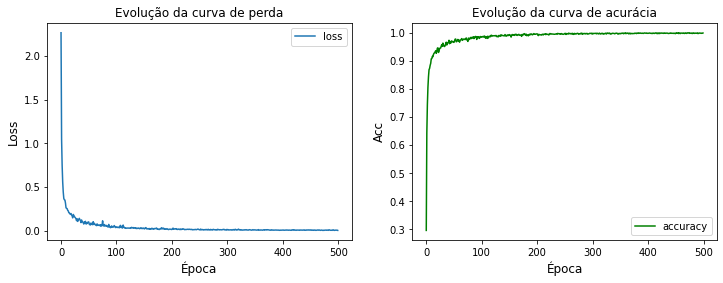

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(121), plt.plot(history.history['loss'], label='loss')
#plt.subplot(121), plt.plot(history.history['val_loss'], label='val_loss', color='purple')
plt.xlabel('Época', fontsize=12), plt.ylabel('Loss', fontsize=12)
plt.title('Evolução da curva de perda')
plt.legend()
plt.subplot(122), plt.plot(history.history['accuracy'], label = 'accuracy', color='green')
#plt.subplot(122), plt.plot(history.history['val_accuracy'], label = 'val_accuracy', color='red')
plt.xlabel('Época', fontsize=12), plt.ylabel('Acc', fontsize=12)
plt.title('Evolução da curva de acurácia')
plt.legend()
plt.show()

In [ ]:
### TEST ACC ###
scores = model.evaluate(input_test, y_test)
print('\n%s : %.2f%%' % (model.metrics_names[1], scores[1] * 100))

35/35 [==============================] - 0s 3ms/step - loss: 0.0081 - accuracy: 0.9982

accuracy : 99.82%


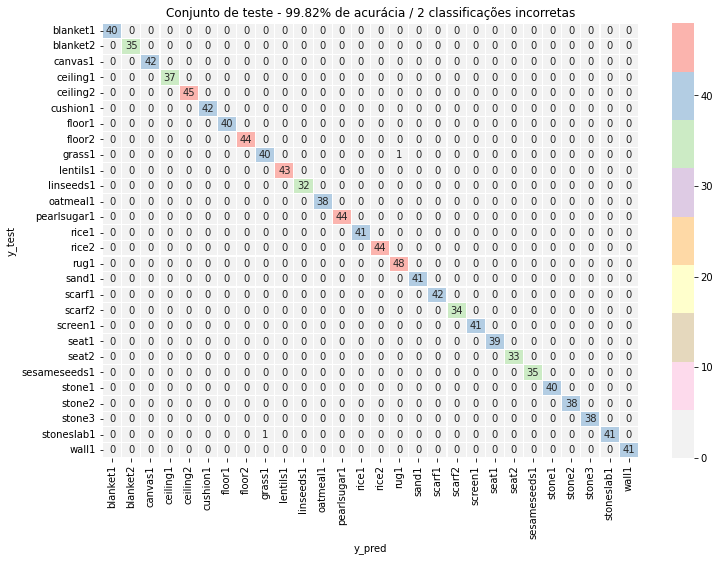

In [ ]:
y_pred = model.predict(input_test)
plt.figure(figsize = (12,8))
cm = confusion_matrix(tf.argmax(y_test, axis=1), tf.argmax(y_pred, axis=1))
acc = np.trace(cm)/input_test.shape[0] * 100
erros = tf.reduce_sum(cm)-tf.linalg.trace(cm)
plt.title('Conjunto de teste - %.2f%% de acurácia / %d classificações incorretas' % (acc, erros))
labels = ['blanket1','blanket2','canvas1','ceiling1','ceiling2','cushion1',
       'floor1','floor2','grass1','lentils1','linseeds1','oatmeal1',
       'pearlsugar1','rice1','rice2','rug1','sand1','scarf1',
       'scarf2','screen1','seat1','seat2','sesameseeds1','stone1',
       'stone2','stone3','stoneslab1','wall1']

sn.heatmap(cm, cmap='Pastel1_r', linewidths=.1, annot=True, fmt=".3g", xticklabels=labels, yticklabels=labels)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [ ]:
dic = {0:'blanket1',1:'blanket2',2:'canvas1',3:'ceiling1',4:'ceiling2',5:'cushion1',
       6:'floor1',7:'floor2',8:'grass1',9:'lentils1',10:'linseeds1',11:'oatmeal1',
       12:'pearlsugar1',13:'rice1',14:'rice2',15:'rug1',16:'sand1',17:'scarf1',
       18:'scarf2',19:'screen1',20:'seat1',21:'seat2',22:'sesameseeds1',23:'stone1',
       24:'stone2',25:'stone3',26:'stoneslab1',27:'wall1'}

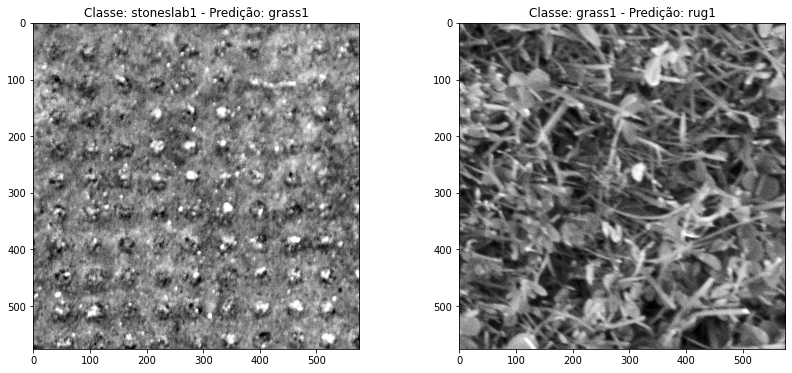

In [ ]:
dif = tf.argmax(y_test, axis=1)-tf.argmax(y_pred, axis=1)
indices = np.where(dif!=0)[0]
plt.figure(figsize=(14,6))
plt.subplot(121), plt.imshow(tf.squeeze(x_test[indices[0]]), cmap='gray')
r1 = tf.argmax(y_test, axis=1)[indices[0]]
f1 = tf.argmax(y_pred, axis=1)[indices[0]]
plt.title('Classe: %s - Predição: %s' % (dic[int(r1)], dic[int(f1)]))
plt.subplot(122), plt.imshow(tf.squeeze(x_test[indices[1]]), cmap='gray')
r2 = tf.argmax(y_test, axis=1)[indices[1]]
f2 = tf.argmax(y_pred, axis=1)[indices[1]]
plt.title('Classe: %s - Predição: %s' % (dic[int(r2)], dic[int(f2)]))
#plt.subplot(133), plt.imshow(tf.squeeze(x_test[indices[2]]), cmap='gray')
#r3 = tf.argmax(y_test, axis=1)[indices[2]]
#f3 = tf.argmax(y_pred, axis=1)[indices[2]]
#plt.title('Classe: %s - Predição: %s' % (dic[int(r3)], dic[int(f3)]))
plt.show()

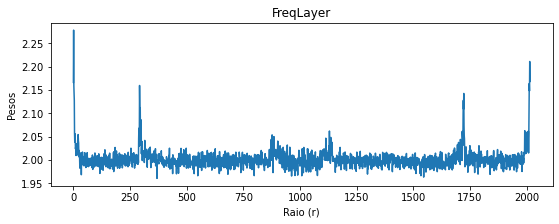

In [ ]:
plt.figure(figsize=(9,3))
plt.plot(model.get_weights()[0])
plt.title('FreqLayer')
plt.xlabel('Raio (r)'), plt.ylabel('Pesos')
plt.show()

#### Final experiment

In [ ]:
### dense ###
tf.random.set_seed(s) #s
init = 'glorot_normal' #glorot_normal
function = 'LeakyReLU' #LeakyReLU
#function = tf.keras.layers.LeakyReLU(alpha=0.4)

model = Sequential([
    FreqLayer(1, kernel_initializer=tf.keras.initializers.RandomNormal(mean=2, stddev=0.01)), #0.01
    Dense(128, activation=function, #128
          kernel_initializer=init, bias_initializer=init),
    Dropout(0.25), #0.25
    Dense(64, activation=function, #128
         kernel_initializer=init, bias_initializer=init),
    Dropout(0.15),  #0.15
    Dense(28, activation='softmax')])

In [ ]:
### inverse time decay  ###
inversetime_decay = tf.keras.optimizers.schedules.InverseTimeDecay(
  initial_learning_rate = 0.01, #0.01-original e 0.0001-30%
  decay_steps = input.shape[0]/10,
  decay_rate = 0.009) #0.009 - 99,82%

### optimizers ###
d_m=0.6 #momentum - dense layers

opt1 = SGD(learning_rate=inversetime_decay, momentum=0.3) #84

opt2 = tfrs.experimental.optimizers.CompositeOptimizer([
      (SGD(learning_rate=inversetime_decay, momentum=0.0), lambda: [model.layers[0].kernel]),
      (SGD(learning_rate=inversetime_decay, momentum=d_m), lambda: model.layers[1].weights),
      (SGD(learning_rate=inversetime_decay, momentum=d_m), lambda: model.layers[2].weights),
      (SGD(learning_rate=inversetime_decay, momentum=d_m), lambda: model.layers[3].weights),
      (SGD(learning_rate=inversetime_decay, momentum=d_m), lambda: model.layers[4].weights),
      (SGD(learning_rate=inversetime_decay, momentum=d_m), lambda: model.layers[5].weights)])

opt3 = Adam(learning_rate=0.0001)

model.compile(optimizer=opt2, loss='categorical_crossentropy', metrics=['accuracy'])
#earlystop = tf.keras.callbacks.EarlyStopping(monitor='loss', min_delta=0, patience=500) # patience = 15
#checkpoint = ModelCheckpoint(filepath='/content/drive/MyDrive/Mestrado/Experimentos/exp2-KTD/exp2-pynb/model_exp2fht.weights.best.hdf5', save_best_only=True, verbose=0,save_weights_only=True)
history =  model.fit(input, y_train, epochs=500, batch_size=10, verbose=1, shuffle=True) #validation_split=0.2 #callbacks=[checkpoint]

Epoch 1/500
336/336 [==============================] - 1s 3ms/step - loss: 2.2701 - accuracy: 0.2967
Epoch 2/500
336/336 [==============================] - 1s 3ms/step - loss: 1.0438 - accuracy: 0.6512
Epoch 3/500
336/336 [==============================] - 1s 3ms/step - loss: 0.7454 - accuracy: 0.7411
Epoch 4/500
336/336 [==============================] - 1s 3ms/step - loss: 0.5582 - accuracy: 0.8027
Epoch 5/500
336/336 [==============================] - 1s 3ms/step - loss: 0.4378 - accuracy: 0.8461
Epoch 6/500
336/336 [==============================] - 1s 3ms/step - loss: 0.3899 - accuracy: 0.8610
Epoch 7/500
336/336 [==============================] - 1s 3ms/step - loss: 0.3609 - accuracy: 0.8693
Epoch 8/500
336/336 [==============================] - 1s 3ms/step - loss: 0.3189 - accuracy: 0.8890
Epoch 9/500
336/336 [==============================] - 1s 3ms/step - loss: 0.3762 - accuracy: 0.8756
Epoch 10/500
336/336 [==============================] - 1s 3ms/step - loss: 0.2829 - accura

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 freq_layer_1 (FreqLayer)    (None, 2016)              2016      
                                                                 
 dense_3 (Dense)             (None, 128)               258176    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 28)                1820      
                                                                 
Total params: 270,268
Trainable params: 270,268
Non-tr

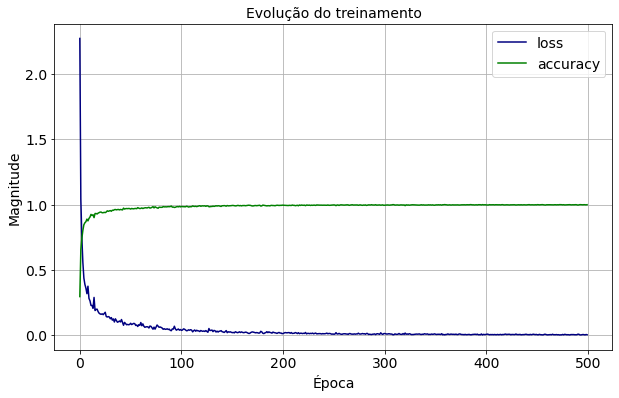

In [ ]:
plt.figure(figsize=(10,6))
f = 14
plt.plot(history.history['loss'], label='loss', color='navy')
#plt.subplot(121), plt.plot(history.history['val_loss'], label='val_loss', color='purple')
#plt.xlabel('Época', fontsize=14), plt.ylabel('Loss', fontsize=14)
#plt.title('Evolução da curva de perda')
plt.plot(history.history['accuracy'], label = 'accuracy', color='green')
#plt.subplot(122), plt.plot(history.history['val_accuracy'], label = 'val_accuracy', color='red')
plt.xlabel('Época', fontsize=f), plt.ylabel('Magnitude', fontsize=f)
plt.xticks(fontsize=f)
plt.yticks(fontsize=f)
plt.title('Evolução do treinamento', fontsize=f)
plt.legend(fontsize=f)
plt.grid()
plt.show()

In [ ]:
model.load_weights('/content/drive/MyDrive/Mestrado/Experimentos/exp2-KTD/exp2-pynb/model_exp2fht.weights.best.hdf5')

In [ ]:
### TEST ACC ###
#time=8min22s
scores = model.evaluate(input_test, y_test)
print('\n%s : %.2f%%' % (model.metrics_names[1], scores[1] * 100))

35/35 [==============================] - 0s 2ms/step - loss: 0.0089 - accuracy: 0.9982

accuracy : 99.82%


35/35 [==============================] - 0s 3ms/step


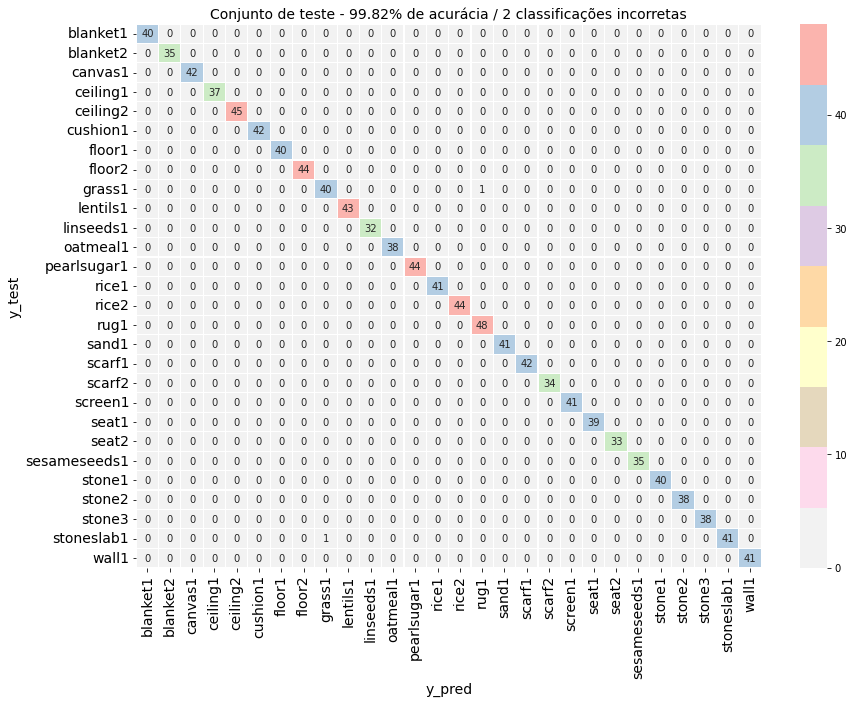

In [ ]:
y_pred = model.predict(input_test)
f = 14
plt.figure(figsize = (14,10))
cm = confusion_matrix(tf.argmax(y_test, axis=1), tf.argmax(y_pred, axis=1))
acc = np.trace(cm)/input_test.shape[0] * 100
erros = tf.reduce_sum(cm)-tf.linalg.trace(cm)
plt.title('Conjunto de teste - %.2f%% de acurácia / %d classificações incorretas' % (acc, erros),fontsize=f)
labels = ['blanket1','blanket2','canvas1','ceiling1','ceiling2','cushion1',
       'floor1','floor2','grass1','lentils1','linseeds1','oatmeal1',
       'pearlsugar1','rice1','rice2','rug1','sand1','scarf1',
       'scarf2','screen1','seat1','seat2','sesameseeds1','stone1',
       'stone2','stone3','stoneslab1','wall1']

sn.heatmap(cm, cmap='Pastel1_r', linewidths=.1, annot=True, fmt=".3g", xticklabels=labels, yticklabels=labels)
plt.xlabel('y_pred',fontsize=f)
plt.ylabel('y_test',fontsize=f)
plt.xticks(rotation=90,fontsize=f)
plt.yticks(rotation=0,fontsize=f)
plt.show()

In [ ]:
dic = {0:'blanket1',1:'blanket2',2:'canvas1',3:'ceiling1',4:'ceiling2',5:'cushion1',
       6:'floor1',7:'floor2',8:'grass1',9:'lentils1',10:'linseeds1',11:'oatmeal1',
       12:'pearlsugar1',13:'rice1',14:'rice2',15:'rug1',16:'sand1',17:'scarf1',
       18:'scarf2',19:'screen1',20:'seat1',21:'seat2',22:'sesameseeds1',23:'stone1',
       24:'stone2',25:'stone3',26:'stoneslab1',27:'wall1'}

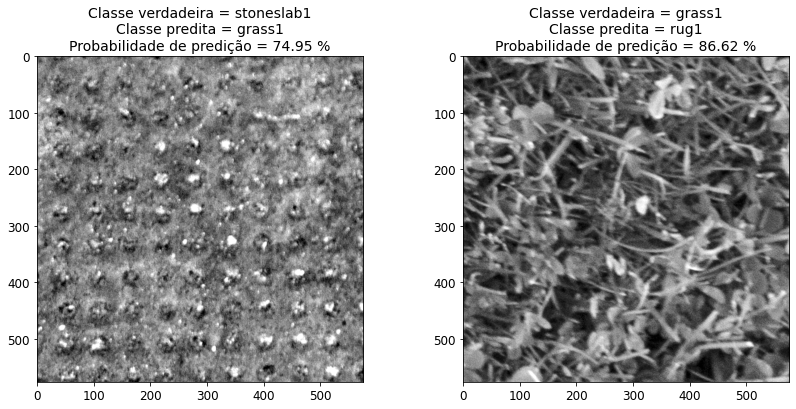

In [ ]:
dif = tf.argmax(y_test, axis=1)-tf.argmax(y_pred, axis=1)
indices = np.where(dif!=0)[0]
plt.figure(figsize=(14,6))
plt.subplot(121), plt.imshow(tf.squeeze(x_test[indices[0]]), cmap='gray')
r1 = tf.argmax(y_test, axis=1)[indices[0]]
f1 = tf.argmax(y_pred, axis=1)[indices[0]]
p1=np.amax((y_pred)[indices[0]])
t1 = "Classe verdadeira = {}\nClasse predita = {}\nProbabilidade de predição = {:.2f} %" \
            .format(dic[int(r1)], dic[int(f1)], p1*100)
plt.title(t1, fontsize=f)
plt.xticks(fontsize=f-2)
plt.yticks(fontsize=f-2)

plt.subplot(122), plt.imshow(tf.squeeze(x_test[indices[1]]), cmap='gray')
r2 = tf.argmax(y_test, axis=1)[indices[1]]
f2 = tf.argmax(y_pred, axis=1)[indices[1]]
p2=np.amax((y_pred)[indices[1]])
t2 = "Classe verdadeira = {}\nClasse predita = {}\nProbabilidade de predição = {:.2f} %" \
            .format(dic[int(r2)], dic[int(f2)], p2*100)
plt.title(t2, fontsize=f)
plt.xticks(fontsize=f-2)
plt.yticks(fontsize=f-2)
#plt.subplot(133), plt.imshow(tf.squeeze(x_test[indices[2]]), cmap='gray')
#r3 = tf.argmax(y_test, axis=1)[indices[2]]
#f3 = tf.argmax(y_pred, axis=1)[indices[2]]
#plt.title('Classe: %s - Predição: %s' % (dic[int(r3)], dic[int(f3)]))
plt.show()

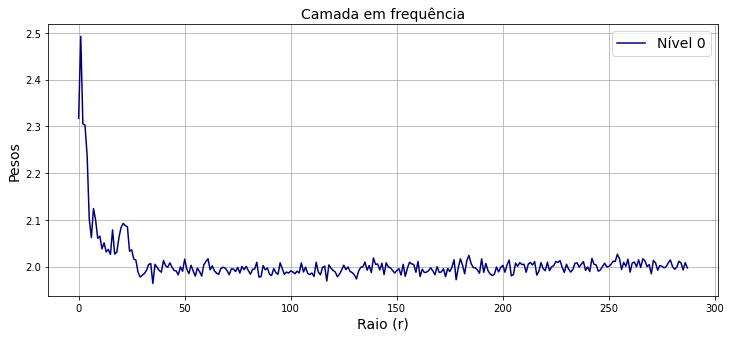

In [ ]:
plt.figure(figsize=(12,5))
nivel0 = 288
plt.plot(model.get_weights()[0][0:nivel0], color='navy', label='Nível 0')
plt.title('Camada em frequência',fontsize=f)
plt.xlabel('Raio (r)',fontsize=f), plt.ylabel('Pesos',fontsize=f)
plt.legend(fontsize=f)
plt.grid()
plt.show()

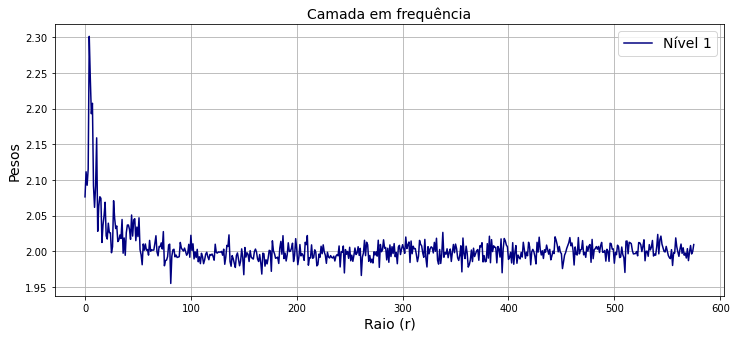

In [ ]:
plt.figure(figsize=(12,5))
nivel1 = 864
plt.plot(model.get_weights()[0][nivel0:nivel1],color='navy', label='Nível 1')
plt.title('Camada em frequência',fontsize=f)
plt.xlabel('Raio (r)',fontsize=f), plt.ylabel('Pesos',fontsize=f)
plt.legend(fontsize=f)
plt.grid()
plt.show()

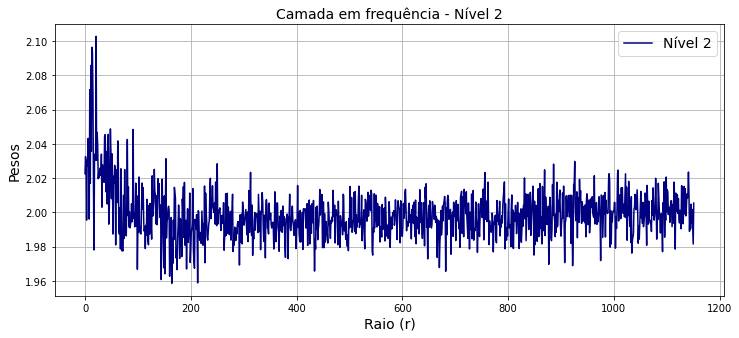

In [ ]:
plt.figure(figsize=(12,5))
nivel2 = 2016
plt.plot(model.get_weights()[0][nivel1:nivel2],color='navy', label='Nível 2')
plt.title('Camada em frequência - Nível 2',fontsize=f)
plt.xlabel('Raio (r)',fontsize=f), plt.ylabel('Pesos',fontsize=f)
plt.legend(fontsize=f)
plt.grid()
plt.show()

#### Test new plots

In [ ]:
def coefs_per_block(input_ = model.get_weights(), example=0, nivel0=50, nivel1=25, nivel2=12):
    'nivel 0 - 1 bloco - 3 curvas'
    aneis0 = nivel0
    #x0 = input_[example][:aneis0*3]
    x0 = input_[example][:aneis0]
    #x0_g = input_[example][aneis0:aneis0*2]
    #x0_b = input_[example][aneis0*2:aneis0*3]

    n0 = x0

    final0 = aneis0

    'nivel 1 - 4 blocos - 3 curvas'
    aneis1 = nivel1
    #x1= input_[example][50*3:(50*3)+(100*3)] #150:450 = 300 coefs empilhados

    # blocos 100x100 para l=2 > 25 aneis por bloco
    #canal R - 100 coefs
    x1_b1 = input_[example][final0:final0+aneis1] #150:175
    x1_b2 = input_[example][final0+aneis1:final0+(aneis1*2)] #175:200
    x1_b3 = input_[example][final0+(aneis1*2):final0+(aneis1*3)] #200:225
    x1_b4 = input_[example][final0+(aneis1*3):final0+(aneis1*4)] #225:250

    final1 = final0+(aneis1*4)

    final_n1 = final1 #final2+(aneis1*4)

    n1_b1 = x1_b1#_r, x1_b1_g, x1_b1_b
    n1_b2 = x1_b2#_r, x1_b2_g, x1_b2_b
    n1_b3 = x1_b3#_r, x1_b3_g, x1_b3_b
    n1_b4 = x1_b4#_r, x1_b4_g, x1_b4_b

    'nivel 2 - 16 blocos - 3 curvas'
    aneis2 = nivel2 #576 coefs no total
    #x2 = input_[example][(50*3)+(100*3):]

    #canal R
    x2_b1_r = input_[example][final_n1:final_n1+aneis2]
    x2_b2_r = input_[example][final_n1+aneis2:final_n1+(aneis2*2)]
    x2_b3_r = input_[example][final_n1+(aneis2*2):final_n1+(aneis2*3)]
    x2_b4_r = input_[example][final_n1+(aneis2*3):final_n1+(aneis2*4)]
    x2_b5_r = input_[example][final_n1+(aneis2*4):final_n1+(aneis2*5)]
    x2_b6_r = input_[example][final_n1+(aneis2*5):final_n1+(aneis2*6)]
    x2_b7_r = input_[example][final_n1+(aneis2*6):final_n1+(aneis2*7)]
    x2_b8_r = input_[example][final_n1+(aneis2*7):final_n1+(aneis2*8)]
    x2_b9_r = input_[example][final_n1+(aneis2*8):final_n1+(aneis2*9)]
    x2_b10_r = input_[example][final_n1+(aneis2*9):final_n1+(aneis2*10)]
    x2_b11_r = input_[example][final_n1+(aneis2*10):final_n1+(aneis2*11)]
    x2_b12_r = input_[example][final_n1+(aneis2*11):final_n1+(aneis2*12)]
    x2_b13_r = input_[example][final_n1+(aneis2*12):final_n1+(aneis2*13)]
    x2_b14_r = input_[example][final_n1+(aneis2*13):final_n1+(aneis2*14)]
    x2_b15_r = input_[example][final_n1+(aneis2*14):final_n1+(aneis2*15)]
    x2_b16_r = input_[example][final_n1+(aneis2*15):final_n1+(aneis2*16)]

    #final_n2r = final_n1+(aneis2*16)

    n2_b1 = x2_b1_r#, x2_b1_g, x2_b1_b
    n2_b2 = x2_b2_r#, x2_b2_g, x2_b2_b
    n2_b3 = x2_b3_r#, x2_b3_g, x2_b3_b
    n2_b4 = x2_b4_r#, x2_b4_g, x2_b4_b
    n2_b5 = x2_b5_r#, x2_b5_g, x2_b5_b
    n2_b6 = x2_b6_r#, x2_b6_g, x2_b6_b
    n2_b7 = x2_b7_r#, x2_b7_g, x2_b7_b
    n2_b8 = x2_b8_r#, x2_b8_g, x2_b8_b
    n2_b9 = x2_b9_r#, x2_b9_g, x2_b9_b
    n2_b10 = x2_b10_r#, x2_b10_g, x2_b10_b
    n2_b11 = x2_b11_r#, x2_b11_g, x2_b11_b
    n2_b12 = x2_b12_r#, x2_b12_g, x2_b12_b
    n2_b13 = x2_b13_r#, x2_b13_g, x2_b13_b
    n2_b14 = x2_b14_r#, x2_b14_g, x2_b14_b
    n2_b15 = x2_b15_r#, x2_b15_g, x2_b15_b
    n2_b16 = x2_b16_r#, x2_b16_g, x2_b16_b



    return n0, n1_b1, n1_b2, n1_b3, n1_b4, n2_b1, n2_b1, n2_b2, n2_b3, n2_b4, n2_b5, n2_b6, n2_b7, n2_b8, n2_b9, n2_b10, n2_b11, n2_b12, n2_b13, n2_b14, n2_b15, n2_b16
def coefs_plot(exp = 0, blck = 0, font=14):
    f=font
    y = 'Pesos'
    x = 'Raio (r)'
    'nivel 0'

    plt.figure(figsize=(12,6))
    #plt.subplot(132), plt.plot(x1, color='navy', label='Nível 1')
    plt.subplot(111), plt.plot(n0, color='black')#, label='R')
    #plt.subplot(111), plt.plot(n0[1], color='green', label='G')
    #plt.subplot(111), plt.plot(n0[2], color='navy', label='B')
    plt.title('Camada em frequência - Nível 0', fontsize=f), plt.xlabel(x, fontsize=f), plt.ylabel(y, fontsize=f)
    #plt.legend()
    plt.grid()
    plt.show()

    'nivel 1'
    plt.figure(figsize=(24,14))

    plt.subplot(221), plt.plot(n1_b1, color='black')
    #plt.subplot(221), plt.plot(n1_b1[1], color='green', label='G')
    #plt.subplot(221), plt.plot(n1_b1[2], color='navy', label='B')
    plt.title('Bloco 1', fontsize=f), plt.xlabel(x, fontsize=f), plt.ylabel(y, fontsize=f)
    #plt.legend()
    plt.grid()

    plt.subplot(222), plt.plot(n1_b2, color='black')
    #plt.subplot(222), plt.plot(n1_b2[1], color='green', label='G')
    #plt.subplot(222), plt.plot(n1_b2[2], color='navy', label='B')
    plt.title('Bloco 2', fontsize=f), plt.xlabel(x, fontsize=f), plt.ylabel(y, fontsize=f)
    #plt.legend()
    plt.grid()

    plt.subplot(223), plt.plot(n1_b3, color='black')
    #plt.subplot(223), plt.plot(n1_b3[1], color='green', label='G')
    #plt.subplot(223), plt.plot(n1_b3[2], color='navy', label='B')
    plt.title('Bloco 3', fontsize=f), plt.xlabel(x, fontsize=f), plt.ylabel(y, fontsize=f)
    #plt.legend()
    plt.grid()

    plt.subplot(224), plt.plot(n1_b4, color='black')
    #plt.subplot(224), plt.plot(n1_b4[1], color='green', label='G')
    #plt.subplot(224), plt.plot(n1_b4[2], color='navy', label='B')
    #plt.subplot(133), plt.plot(x2, color='navy', label='Nível 2')
    plt.title('Bloco 4', fontsize=f), plt.xlabel(x, fontsize=f), plt.ylabel(y, fontsize=f)
    #plt.legend()
    plt.grid()

    plt.suptitle('Camada em frequência - Nível 1', fontsize=f, y=0.92)
    plt.show()

    'nivel 2'
    plt.figure(figsize=(24,23))
    f_leg = 8
    'bloco1'
    plt.subplot(441), plt.plot(n2_b1, color='black')
    #plt.subplot(441), plt.plot(n2_b1[1], color='green', label='G')
    #plt.subplot(441), plt.plot(n2_b1[2], color='navy', label='B')
    plt.title('Bloco 1', fontsize=f), plt.xlabel(x, fontsize=f), plt.ylabel(y, fontsize=f)
    #plt.legend(fontsize=f_leg)
    plt.grid()

    'bloco2'
    plt.subplot(442), plt.plot(n2_b2, color='black')
    #plt.subplot(442), plt.plot(n2_b2[1], color='green', label='G')
    #plt.subplot(442), plt.plot(n2_b2[2], color='navy', label='B')
    plt.title('Bloco 2', fontsize=f), plt.xlabel(x, fontsize=f), plt.ylabel(y, fontsize=f)
    #plt.legend(fontsize=f_leg)
    plt.grid()

    'bloco3'
    plt.subplot(443), plt.plot(n2_b3, color='black')
    #plt.subplot(443), plt.plot(n2_b3[1], color='green', label='G')
    #plt.subplot(443), plt.plot(n2_b3[2], color='navy', label='B')
    plt.title('Bloco 3', fontsize=f), plt.xlabel(x, fontsize=f), plt.ylabel(y, fontsize=f)
    #plt.legend(fontsize=f_leg)
    plt.grid()

    'bloco4'
    plt.subplot(444), plt.plot(n2_b4, color='black')
    #plt.subplot(444), plt.plot(n2_b4[1], color='green', label='G')
    #plt.subplot(444), plt.plot(n2_b4[2], color='navy', label='B')
    plt.title('Bloco 4', fontsize=f), plt.xlabel(x, fontsize=f), plt.ylabel(y, fontsize=f)
    #plt.legend(fontsize=f_leg)
    plt.grid()

    'bloco5'
    plt.subplot(445), plt.plot(n2_b5, color='black')
    #plt.subplot(445), plt.plot(n2_b5[1], color='green', label='G')
    #plt.subplot(445), plt.plot(n2_b5[2], color='navy', label='B')
    plt.title('Bloco 5', fontsize=f), plt.xlabel(x, fontsize=f), plt.ylabel(y, fontsize=f)
    #plt.legend(fontsize=f_leg)
    plt.grid()

    'bloco5'
    plt.subplot(446), plt.plot(n2_b6, color='black')
    #plt.subplot(446), plt.plot(n2_b6[1], color='green', label='G')
    #plt.subplot(446), plt.plot(n2_b6[2], color='navy', label='B')
    plt.title('Bloco 6', fontsize=f), plt.xlabel(x, fontsize=f), plt.ylabel(y, fontsize=f)
    #plt.legend(fontsize=f_leg)
    plt.grid()

    'bloco5'
    plt.subplot(447), plt.plot(n2_b7, color='black')
    #plt.subplot(447), plt.plot(n2_b7[1], color='green', label='G')
    #plt.subplot(447), plt.plot(n2_b7[2], color='navy', label='B')
    plt.title('Bloco 7', fontsize=f), plt.xlabel(x, fontsize=f), plt.ylabel(y, fontsize=f)
    #plt.legend(fontsize=f_leg)
    plt.grid()

    'bloco5'
    plt.subplot(448), plt.plot(n2_b8, color='black')
    #plt.subplot(448), plt.plot(n2_b8[1], color='green', label='G')
    #plt.subplot(448), plt.plot(n2_b8[2], color='navy', label='B')
    plt.title('Bloco 8', fontsize=f), plt.xlabel(x, fontsize=f), plt.ylabel(y, fontsize=f)
    #plt.legend(fontsize=f_leg)
    plt.grid()

    'bloco5'
    plt.subplot(449), plt.plot(n2_b9, color='black')
    #plt.subplot(449), plt.plot(n2_b9[1], color='green', label='G')
    #plt.subplot(449), plt.plot(n2_b9[2], color='navy', label='B')
    plt.title('Bloco 9', fontsize=f), plt.xlabel(x, fontsize=f), plt.ylabel(y, fontsize=f)
    #plt.legend(fontsize=f_leg)
    plt.grid()

    'bloco5'
    plt.subplot(4,4,10), plt.plot(n2_b10, color='black')
    #plt.subplot(4,4,10), plt.plot(n2_b10[1], color='green', label='G')
    #plt.subplot(4,4,10), plt.plot(n2_b10[2], color='navy', label='B')
    plt.title('Bloco 10', fontsize=f), plt.xlabel(x, fontsize=f), plt.ylabel(y, fontsize=f)
    #plt.legend(fontsize=f_leg)
    plt.grid()

    'bloco5'
    plt.subplot(4,4,11), plt.plot(n2_b11, color='black')
    #plt.subplot(4,4,11), plt.plot(n2_b11[1], color='green', label='G')
    #plt.subplot(4,4,11), plt.plot(n2_b11[2], color='navy', label='B')
    plt.title('Bloco 11', fontsize=f), plt.xlabel(x, fontsize=f), plt.ylabel(y, fontsize=f)
    #plt.legend(fontsize=f_leg)
    plt.grid()

    'bloco5'
    plt.subplot(4,4,12), plt.plot(n2_b12, color='black')
    #plt.subplot(4,4,12), plt.plot(n2_b12[1], color='green', label='G')
    #plt.subplot(4,4,12), plt.plot(n2_b12[2], color='navy', label='B')
    plt.title('Bloco 12', fontsize=f), plt.xlabel(x, fontsize=f), plt.ylabel(y, fontsize=f)
    #plt.legend(fontsize=f_leg)
    plt.grid()

    'bloco5'
    plt.subplot(4,4,13), plt.plot(n2_b13, color='black')
    #plt.subplot(4,4,13), plt.plot(n2_b13[1], color='green', label='G')
    #plt.subplot(4,4,13), plt.plot(n2_b13[2], color='navy', label='B')
    plt.title('Bloco 13', fontsize=f), plt.xlabel(x, fontsize=f), plt.ylabel(y, fontsize=f)
    #plt.legend(fontsize=f_leg)
    plt.grid()

    'bloco5'
    plt.subplot(4,4,14), plt.plot(n2_b14, color='black')
    #plt.subplot(4,4,14), plt.plot(n2_b14[1], color='green', label='G')
    #plt.subplot(4,4,14), plt.plot(n2_b14[2], color='navy', label='B')
    plt.title('Bloco 14', fontsize=f), plt.xlabel(x, fontsize=f), plt.ylabel(y, fontsize=f)
    #plt.legend(fontsize=f_leg)
    plt.grid()

    'bloco5'
    plt.subplot(4,4,15), plt.plot(n2_b15, color='black')
    #plt.subplot(4,4,15), plt.plot(n2_b15[1], color='green', label='G')
    #plt.subplot(4,4,15), plt.plot(n2_b15[2], color='navy', label='B')
    plt.title('Bloco 15', fontsize=f), plt.xlabel(x, fontsize=f), plt.ylabel(y, fontsize=f)
    #plt.legend(fontsize=f_leg)
    plt.grid()

    'bloco5'
    plt.subplot(4,4,16), plt.plot(n2_b16, color='black')
    #plt.subplot(4,4,16), plt.plot(n2_b16[1], color='green', label='G')
    #plt.subplot(4,4,16), plt.plot(n2_b16[2], color='navy', label='B')
    plt.title('Bloco 16', fontsize=f), plt.xlabel(x, fontsize=f), plt.ylabel(y, fontsize=f)
    #plt.legend(fontsize=f_leg)
    plt.grid()
    plt.suptitle("Camada em frequência - Nível 2", fontsize=f,y=0.92)
    plt.show()


#pesos
n0, n1_b1, n1_b2, n1_b3, n1_b4, n2_b1, n2_b1, n2_b2, n2_b3, n2_b4, n2_b5, n2_b6, n2_b7, n2_b8, n2_b9, n2_b10, n2_b11, n2_b12, n2_b13, n2_b14, n2_b15, n2_b16 = coefs_per_block(example=0,nivel0=288, nivel1=144, nivel2=72)


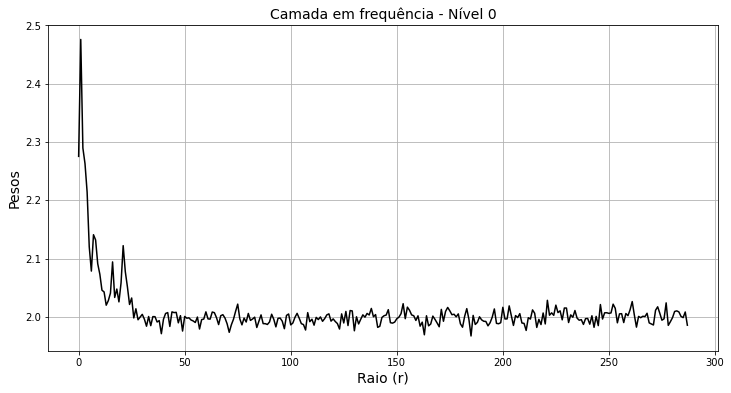

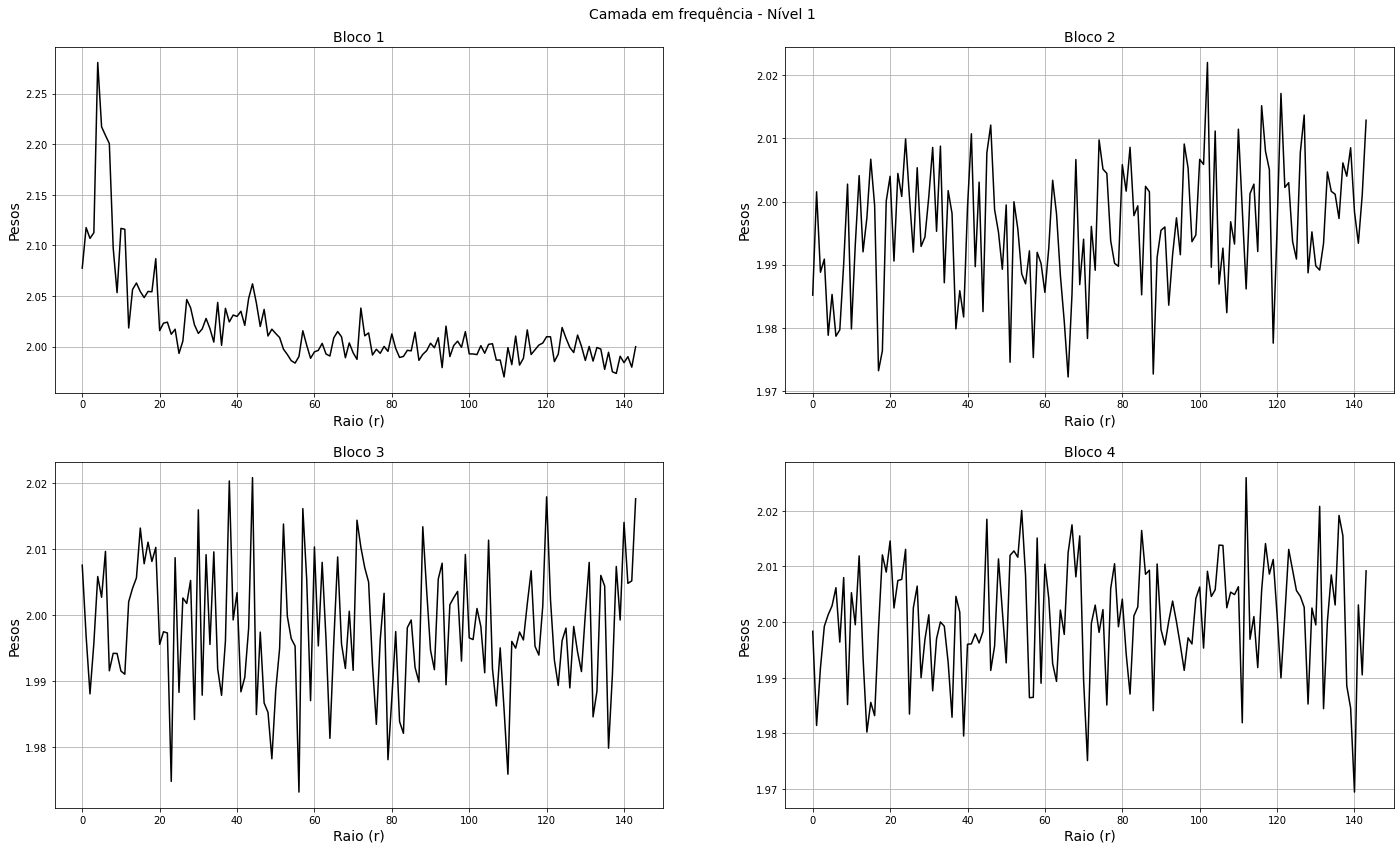

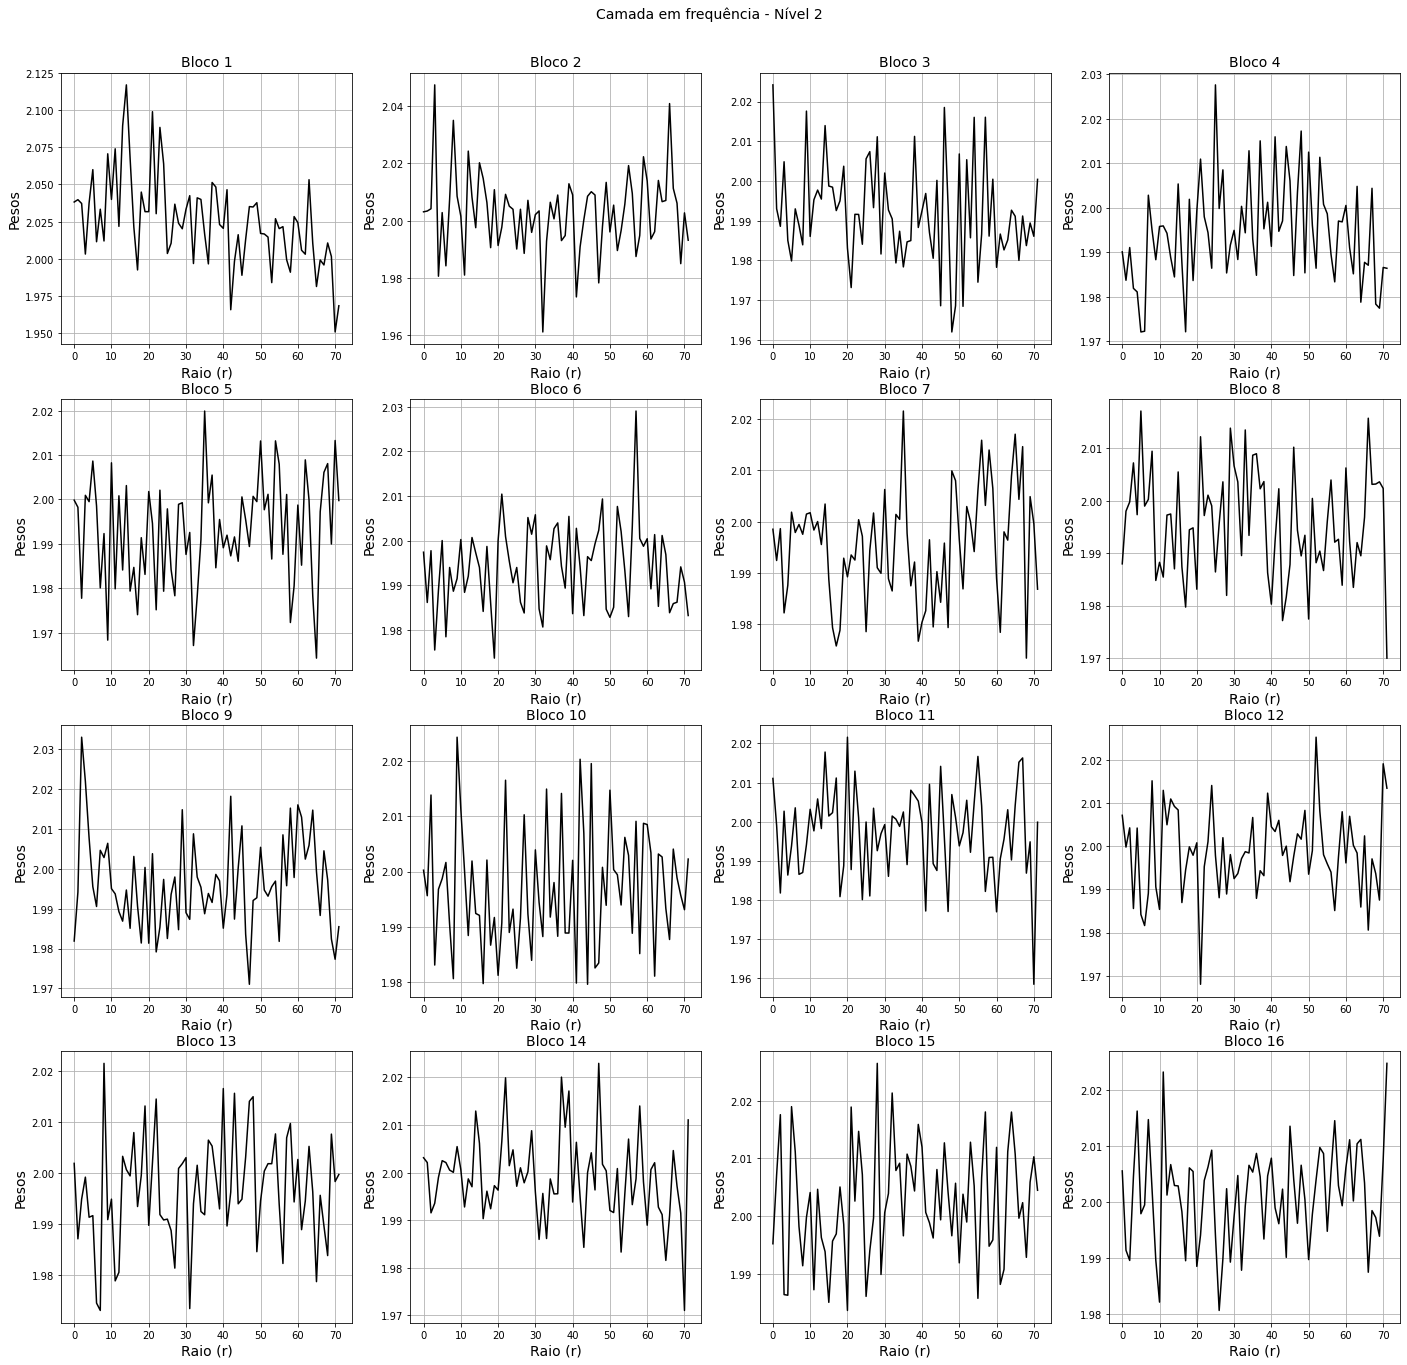

In [ ]:
coefs_plot(font=14)